<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Tensorflow-Developer-ZTM/blob/main/neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network using TensorFlow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Creating Regression Data to view and fit

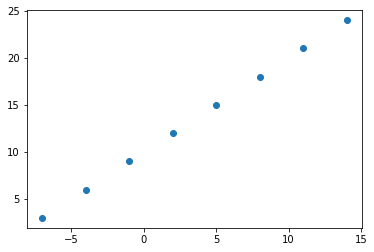

In [4]:
# Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5., 8., 11. , 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X,y)

In [5]:
# The relation in X and y above is `y = X+10`
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [6]:
# Create a demo tensor for out housing price prediction problem

house_info = tf.constant(['bedrooms', 'bathrooms', 'garage'])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrooms', b'bathrooms', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In the data we created above we want to predict y using just one feature   
i.e. X[0] to predict y[0], X[1] to predict y[1], ...  
  
The shape of both input and output is `1`.

In [7]:
X[0], y[0]

(-7.0, 3.0)

## Turn Numpy arrays to tensors

In [8]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

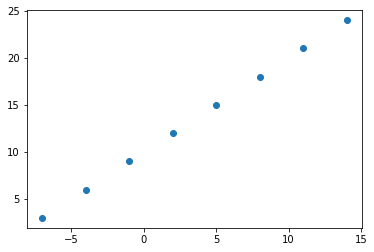

In [10]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow
1.  **Creating a model** - define the `input and output` layers, `hidden layers`.
2.  **Compiling a model** - define the `loss function`(function that tells our model how wrong it is), `Optimizer` (tells our model how to improve the patterns it is learning) and `Evaluation Metrics` (to interpret the performance of our model).
3.  **Fitting a model** - letting the model `find patterns` between features and labels.

In [ ]:
# Setting a random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
                            ])

model.compile(loss = tf.keras.losses.mae, 
              optimizer = , 
              metrics = )